In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import sklearn.metrics
import json
from folium import plugins
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import jaccard_score

The data from geoSCOUT has been partially cleaned and unnecessary columns have been deleted to speed up the process. Let's import the dataset and see how it looks like.

In [2]:
file = "geoscout_inactive.csv"
data = pd.read_csv(file, encoding='ISO-8859-1')
data.head()

C:\Users\siava\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6,43) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Abbreviated Well ID,User-Format Well ID,Area,Well Status Text,Org Operator Name,Cur Operator Name,Lic/WA/WID/Permit #,Date Well Licensed,Date Well Spudded,Date Drlg Completed,...,Last Inject. YYYY/MM,Cumulative GAS Inject. (e3m3),Cumulative WTR Inject. (m3),Cumulative Steam Inject. (m3),Total Production Hrs,First 12 mo. Hrs On,Last 12 mo. Hrs On,Most Recent 12 mo. Hrs On,CPA Pretty Well ID (Long),CPA Well ID (Long)
0,F1/06-06-001-01W4/0,1F1/06-06-001-01W4/00,AB,Act WTR Farm,Domestic Water Well,Domestic Water Well,78503,1979-10-09,1977-08-20,1977-08-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1F1/06-06-001-01W4/00,1F1060600101W400
1,F1/05-10-001-01W4/0,1F1/05-10-001-01W4/00,AB,Act WTR Farm,Border Grazing Co-Op Ltd,Wildhorse Grazing Ltd,107524,1984-06-07,1984-06-15,1984-06-24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1F1/05-10-001-01W4/00,1F1051000101W400
2,F1/06-17-001-01W4/0,1F1/06-17-001-01W4/00,AB,Act WTR Farm,Domestic Water Well,Domestic Water Well,78504,1979-10-09,1977-08-24,1977-08-24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1F1/06-17-001-01W4/00,1F1061700101W400
3,F1/01-31-001-01W4/0,1F1/01-31-001-01W4/00,AB,Act WTR Farm,Domestic Water Well,Domestic Water Well,29205,1965-10-22,1965-10-22,1965-10-22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1F1/01-31-001-01W4/00,1F1013100101W400
4,F1/06-31-001-01W4/0,1F1/06-31-001-01W4/00,AB,Act WTR Farm,Domestic Water Well,Domestic Water Well,74448,1979-02-13,1977-12-03,1977-12-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1F1/06-31-001-01W4/00,1F1063100101W400


The dataset contains 103 columns. With another glance at the dataset, we only keep relevant columns. 

In [3]:
geoscout_data = data[['Abbreviated Well ID','TVD (m)','Formation@TD','Govt Surf. Loc.','Production-Casing Depth (m)',
                      'Production-Casing Size (mm)','Rm','BH Temp. (degC)','Drilling Problems','Prod./Inject. Frmtn','Prod Status Text','Producing Field/Area Name',
                      'First Prod YYYY/MM','Last Prod. YYYY/MM','Cumulative GAS Prod. (e3m3)','Cumulative OIL Prod. (m3)','Cumulative CND Prod. (m3)',
                      'Cumulative WTR Prod. (m3)', 'Cumulative BOE Prod. (Bbl)','First 12 mo. Total GAS (e3m3)',
                      'First 12 mo. Total OIL (m3)','First 12 mo. Total CND (m3)','First 12 mo. Total WTR (m3)','First 12 mo. Total BOE (Bbl)',
                      'First 12 mo. Dly Avg. GAS (e3m3)','First 12 mo. Dly Avg. OIL (m3)','First 12 mo. Dly Avg. CND (m3)','First 12 mo. Dly Avg. WTR (m3)',
                      'First 12 mo. Dly Avg. BOE (Bbl)','First 12 mo. Ave GOR (m3/m3)','First 12 mo. Ave WC%','Last 12 mo. Total GAS (e3m3)','Last 12 mo. Total OIL (m3)',
                      'Last 12 mo. Total CND (m3)','Last 12 mo. Total WTR (m3)','Last 12 mo. Total BOE (Bbl)','Last 12 mo. Dly Avg. GAS (e3m3)',
                      'Last 12 mo. Dly Avg. OIL (m3)','Last 12 mo. Dly Avg. CND (m3)','Last 12 mo. Dly Avg. WTR (m3)','Last 12 mo. Dly Avg. BOE (Bbl)',
                      'Last 12 mo. Ave GOR (m3/m3)','Last 12 mo. Ave WC%','Most Recent 12 mo. Total GAS (e3m3)','Most Recent 12 mo. Total OIL (m3)',
                      'Most Recent 12 mo. Total CND (m3)','Most Recent 12 mo. Total WTR (m3)','Most Recent 12 mo. Total BOE (Bbl)',
                      'Most Recent 12 mo. Dly Avg. GAS (e3m3)','Most Recent 12 mo. Dly Avg. OIL (m3)','Most Recent 12 mo. Dly Avg. CND (m3)',
                      'Most Recent 12 mo. Dly Avg. WTR (m3)','Most Recent 12 mo. Dly Avg. BOE (Bbl)','Most Recent 12 mo. Ave GOR (m3/m3)']]

In [4]:
geoscout_data.shape                        

(94968, 54)

Importing the inactive well data downloaded from AER website and keeping columns with necessary info. 

In [5]:
file = "AER_inactive.csv"
data = pd.read_csv(file, encoding='ISO-8859-1', header = None)
data.drop([0,1,2],axis = 0, inplace = True) # dropping the first row in order to assign new header
header_inactive = ['0','LICENSE_NO','COMPANY','UWI','LSD','FIELD_AREA','LICENSE_STATUS','FINAL_DRILL_DATE','LAST_ACTIVITY_DATE','INACTIVE_STATUS_DATE','SUSPENSION_DATE','INSPECTION_DATE','NEXT_INSPECTION_DATE','DOWNHOLE_OPERATION','WELL_TYPE','AER_RISK_CLASS','MEDIUM_RISK_TYPE_6','COMPLIANCE','NON_COMPLAINCE_DETAIL','IWCP','EXCLUSION_REASON']

data.columns = header_inactive
data_inactive = data[['COMPANY','UWI','LSD','LICENSE_STATUS','FINAL_DRILL_DATE','LAST_ACTIVITY_DATE','INACTIVE_STATUS_DATE','SUSPENSION_DATE','INSPECTION_DATE','WELL_TYPE','AER_RISK_CLASS','MEDIUM_RISK_TYPE_6','COMPLIANCE']].reset_index(drop = True)
data_inactive.head()
# data_inactive.to_csv('AER_inactive.csv')

C:\Users\siava\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,COMPANY,UWI,LSD,LICENSE_STATUS,FINAL_DRILL_DATE,LAST_ACTIVITY_DATE,INACTIVE_STATUS_DATE,SUSPENSION_DATE,INSPECTION_DATE,WELL_TYPE,AER_RISK_CLASS,MEDIUM_RISK_TYPE_6,COMPLIANCE
0,ACCEL Canada Holdings Limited,00/08-17-057-21W4/0,8-17-57-21W4,Suspension,29-Jun-1949,31-May-1990,31-May-1991,31-May-1991,10-Sep-2017,Suspended greater than 10 years,Medium,Yes,Compliant
1,ACCEL Canada Holdings Limited,00/13-32-057-21W4/0,13-32-57-21W4,Suspension,29-Jun-1949,30-Sep-2015,30-Sep-2016,26-Jul-2016,29-Oct-2019,Non-flowing Oil Wells with an H2S content < 50...,Low,No,Compliant
2,ACCEL Canada Holdings Limited,00/02-20-057-21W4/0,2-20-57-21W4,Suspension,01-Jul-1949,30-Sep-2004,30-Sep-2005,30-Sep-2005,23-Sep-2015,Suspended greater than 10 years,Medium,Yes,Compliant
3,"Benson, Keith And Jessie",02/03-16-017-13W4/0,3-16-17-13W4,Issued,20-Jun-1949,NaN,30-Jun-1950,NaN,NaN,,Medium,Yes,NaN
4,NEP Canada ULC,00/16-08-050-26W4/2,16-8-50-26W4,Suspension,17-Jul-1949,30-Apr-2013,30-Apr-2014,19-Oct-2015,01-Nov-2019,Non-flowing Oil Wells with an H2S content < 50...,Low,No,Compliant


According to AER Directive 13, if a well is suspended more than 10 years, it will be categorized as 'Medium' risk. As a result, we remove those wells (as well 'Not Reported' risk class) from our dataset (type 6 wells). After removing type 6 wells, our dataset contains 53060 wells out which 5338 are 'Medium' and 125 'High' risk.

In [6]:
data_inactive = data_inactive[(data_inactive['MEDIUM_RISK_TYPE_6'] == 'No') & (data_inactive['AER_RISK_CLASS'] != 'Not Reported')]

In [7]:
data_inactive.shape #total number of wells remained after removing type 6 wells

(53060, 13)

Last, we only keep columns 'COMPANY', 'UWI', 'LSD', 'WELL_TYPE', 'AER_RISK_CLASS' in our final dataset. Other columns (other than type 6) have insignificant effect on the final analysis. 

In [8]:
data_inactive_filtered = data_inactive[['COMPANY', 'UWI', 'LSD', 'WELL_TYPE', 'AER_RISK_CLASS']].reset_index(drop = True)
data_inactive_filtered = data_inactive_filtered.rename(columns = {'UWI':'Abbreviated Well ID'})
data_inactive_filtered.head()

,COMPANY,Abbreviated Well ID,LSD,WELL_TYPE,AER_RISK_CLASS
0,ACCEL Canada Holdings Limited,00/13-32-057-21W4/0,13-32-57-21W4,Non-flowing Oil Wells with an H2S content < 50...,Low
1,NEP Canada ULC,00/16-08-050-26W4/2,16-8-50-26W4,Non-flowing Oil Wells with an H2S content < 50...,Low
2,Long Run Exploration Ltd.,00/07-17-057-21W4/2,7-17-57-21W4,Non-flowing Oil Wells with an H2S content < 50...,Low
3,Ohana Resources Inc.,00/16-21-057-21W4/0,16-21-57-21W4,Non-flowing Oil Wells with an H2S content < 50...,Low
4,Long Run Exploration Ltd.,00/11-21-057-21W4/2,11-21-57-21W4,Gas Wells < 28000 m3/Day that are low risk as ...,Low


In [9]:
data_inactive_filtered[data_inactive_filtered['AER_RISK_CLASS'] == 'Low']['WELL_TYPE'].unique()

array(['Non-flowing Oil Wells with an H2S content < 50 mol/kmole',
       'Gas Wells < 28000 m3/Day that are low risk as per Directive',
       'Water Source Wells',
       'Non-Critical Sour Cased Wells - no perforations',
       'Class 4 Injection Wells'], dtype=object)

Only keeping the wells with gas production

In [10]:
data_inactive_filtered = data_inactive_filtered[(data_inactive_filtered['WELL_TYPE'] =='Gas Wells that can be Medium Risk as per Directive')
                        | (data_inactive_filtered['WELL_TYPE'] =='Gas Wells < 28000 m3/Day that are low risk as per Directive')].reset_index(drop = True)
data_inactive_filtered.head()

,COMPANY,Abbreviated Well ID,LSD,WELL_TYPE,AER_RISK_CLASS
0,Long Run Exploration Ltd.,00/11-21-057-21W4/2,11-21-57-21W4,Gas Wells < 28000 m3/Day that are low risk as ...,Low
1,Crescent Point Energy Corp.,00/13-31-056-06W4/0,13-31-56-6W4,Gas Wells < 28000 m3/Day that are low risk as ...,Low
2,Long Run Exploration Ltd.,00/02-36-031-14W4/2,2-36-31-14W4,Gas Wells < 28000 m3/Day that are low risk as ...,Low
3,NEP Canada ULC,00/07-35-050-26W4/3,7-35-50-26W4,Gas Wells < 28000 m3/Day that are low risk as ...,Low
4,NEP Canada ULC,00/02-28-051-26W4/2,2-28-51-26W4,Gas Wells that can be Medium Risk as per Direc...,Medium


Converting the categorical values of risks to numerical

In [11]:
data_inactive_filtered.loc[:,'AER_RISK_CLASS'] = data_inactive_filtered['AER_RISK_CLASS' ].replace({ 'Low' : 0, 'Medium' : 1, 'High' : 2 })
data_inactive_filtered.head()

,COMPANY,Abbreviated Well ID,LSD,WELL_TYPE,AER_RISK_CLASS
0,Long Run Exploration Ltd.,00/11-21-057-21W4/2,11-21-57-21W4,Gas Wells < 28000 m3/Day that are low risk as ...,0
1,Crescent Point Energy Corp.,00/13-31-056-06W4/0,13-31-56-6W4,Gas Wells < 28000 m3/Day that are low risk as ...,0
2,Long Run Exploration Ltd.,00/02-36-031-14W4/2,2-36-31-14W4,Gas Wells < 28000 m3/Day that are low risk as ...,0
3,NEP Canada ULC,00/07-35-050-26W4/3,7-35-50-26W4,Gas Wells < 28000 m3/Day that are low risk as ...,0
4,NEP Canada ULC,00/02-28-051-26W4/2,2-28-51-26W4,Gas Wells that can be Medium Risk as per Direc...,1


Now we merge the inactive wells with our dataset from geoSCOUT and remove the rows with no production data. 

In [12]:
inactive_data = pd.merge(data_inactive_filtered, geoscout_data, on="Abbreviated Well ID")

inactive_data.dropna(subset = ['Cumulative GAS Prod. (e3m3)'], inplace = True)
inactive_data.dropna(subset = ['Prod./Inject. Frmtn'], inplace = True)


In [13]:
inactive_data.shape

(18592, 58)

Now we need to convert Drilling Problems into numerical values. Drilling Problems may play a role in the final risk category so they need to be included in our final model:

Cells containing Blow: 3
Cells containing Kick: 2
Cells containing Hi Pressure: 1
Cells with no values: 0
Cells containing Lost Circulation: -1

In [14]:
inactive_data['Drilling Problems'].fillna(0, inplace = True)

inactive_data['Drilling Problems'] = inactive_data[['Drilling Problems']].applymap(lambda x: -1 if "Lost Circ" in str(x) else x)
inactive_data['Drilling Problems'] = inactive_data[['Drilling Problems']].applymap(lambda x: 1 if "Hi Press" in str(x) else x)
inactive_data['Drilling Problems'] = inactive_data[['Drilling Problems']].applymap(lambda x: 2 if "Kick" in str(x) else x)
inactive_data['Drilling Problems'] = inactive_data[['Drilling Problems']].applymap(lambda x: 4 if "Blow" in str(x) else x)
inactive_data['Drilling Problems'] = inactive_data[['Drilling Problems']].applymap(lambda x: 3 if "Flow" in str(x) else x)


Finally we need to convert the formation names into numerical values using sklearn package.

In [15]:
inactive_data['Prod./Inject. Frmtn'].value_counts()

Kvik_ss                                2030
Kgrand_rp                              1032
Kmannvl                                1027
Kbluesky                                992
Kglauc_ss                               903
                                       ... 
Kcard_ss;Kdunvegan;Kmannvl;Kgething       1
Kcadomin;Jnikanssn                        1
Kspirit_r;Kgething;Kcadomin               1
Kvik_ss;Knotikwn                          1
Kgen_petr;Kcummings                       1
Name: Prod./Inject. Frmtn, Length: 321, dtype: int64

In [16]:
le = LabelEncoder()
inactive_data['Formation Code'] = le.fit_transform(inactive_data['Prod./Inject. Frmtn'])

In [17]:
inactive_data.dtypes

COMPANY                                    object
Abbreviated Well ID                        object
LSD                                        object
WELL_TYPE                                  object
AER_RISK_CLASS                              int64
TVD (m)                                   float64
Formation@TD                               object
Govt Surf. Loc.                            object
Production-Casing Depth (m)               float64
Production-Casing Size (mm)               float64
Rm                                        float64
BH Temp. (degC)                           float64
Drilling Problems                           int64
Prod./Inject. Frmtn                        object
Prod Status Text                           object
Producing Field/Area Name                  object
First Prod YYYY/MM                         object
Last Prod. YYYY/MM                         object
Cumulative GAS Prod. (e3m3)               float64
Cumulative OIL Prod. (m3)                 float64


Let's visualize how what formations have been produced the most gas in Alberta. 

In [18]:
top20_gas_prod = inactive_data.groupby('Prod./Inject. Frmtn').median().sort_values(by ='Cumulative GAS Prod. (e3m3)',ascending = False).head(20).reset_index() 

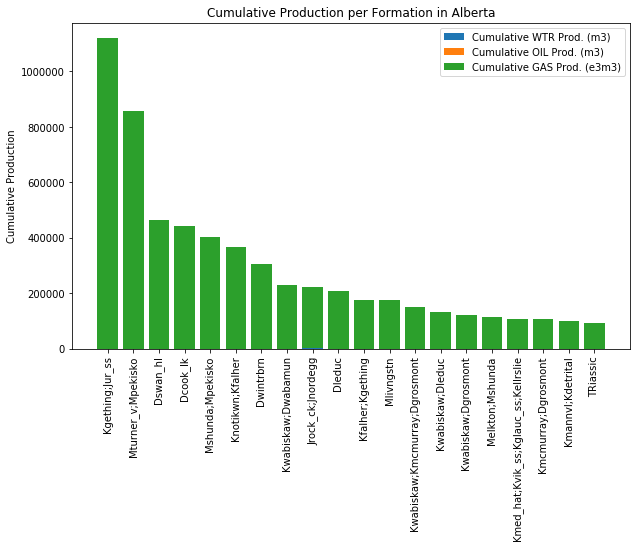

In [19]:

labels = top20_gas_prod['Prod./Inject. Frmtn'].to_list()


gas_prod_per_fromation = top20_gas_prod['Cumulative GAS Prod. (e3m3)'].to_list()

oil_prod_per_fromation = top20_gas_prod['Cumulative OIL Prod. (m3)'].to_list()
water_prod_per_fromation = top20_gas_prod['Cumulative WTR Prod. (m3)'].to_list()

fig, ax = plt.subplots(figsize=(10,6))
width = 0.2
ax.bar(x = labels, height = water_prod_per_fromation, label='Cumulative WTR Prod. (m3)')
ax.bar(x = labels, height = oil_prod_per_fromation, bottom=water_prod_per_fromation,label='Cumulative OIL Prod. (m3)')
ax.bar(x = labels, height = gas_prod_per_fromation, bottom=oil_prod_per_fromation,label='Cumulative GAS Prod. (e3m3)')

ax.set_ylabel('Cumulative Production')
ax.set_title('Cumulative Production per Formation in Alberta')
ax.set_xticklabels(labels, rotation=90)
ax.legend()

plt.show()


Text(0, 0.5, 'Median Gas Production (e3m3)')

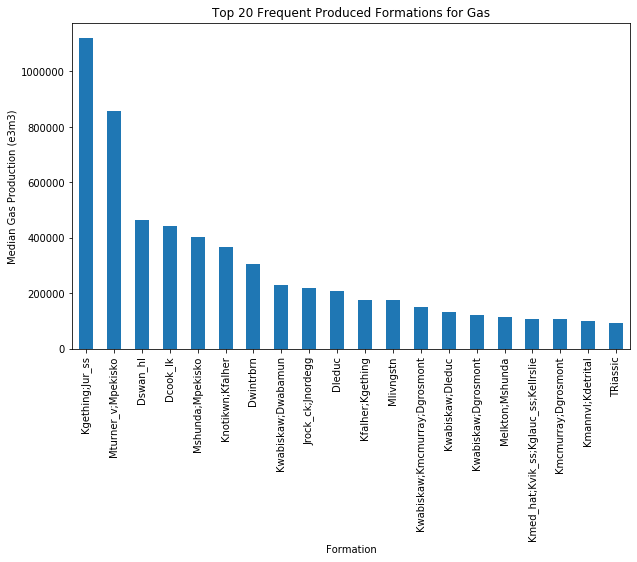

In [20]:
ax = inactive_data[inactive_data['Cumulative GAS Prod. (e3m3)'] != 0].groupby('Prod./Inject. Frmtn')['Cumulative GAS Prod. (e3m3)'].median().sort_values(ascending = False).head(20).plot(kind='bar',
                                    figsize=(10,6),
                                    title="Top 20 Frequent Produced Formations for Gas")
ax.set_xlabel("Formation")
ax.set_ylabel("Median Gas Production (e3m3)")

As per Directive 13, gas wells with less than 28,000 cu m/day are considered low risk. We want to see how the first 12 monthns production affect the final production and also risk class of inactive wells. 

Let's define our features first.

In [21]:
inactive_data.isnull().values.any()

True

In [22]:
inactive_data.dropna(how="any", inplace = True) 
inactive_data.shape

(6880, 59)

It can be seen that there is an imbalance in the dataset (majority is 'Low' risk)

In [23]:
inactive_data[inactive_data['AER_RISK_CLASS'] == 2].shape

(1, 59)

In [24]:
inactive_data = inactive_data[inactive_data['AER_RISK_CLASS'] != 2]
inactive_data.shape

(6879, 59)

In [25]:
rc = inactive_data['AER_RISK_CLASS'].values 

features = inactive_data[['TVD (m)','First 12 mo. Total GAS (e3m3)','First 12 mo. Total WTR (m3)', 
                          'Drilling Problems']]
features.shape

(6879, 4)

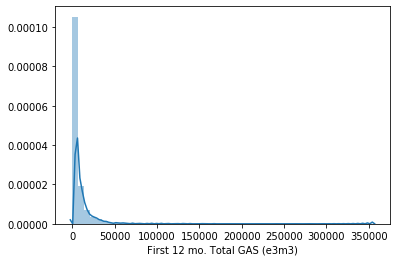

In [26]:
sns.distplot(inactive_data['First 12 mo. Total GAS (e3m3)'])

In [27]:
inactive_data['First 12 mo. Total GAS (e3m3)'].describe()

count      6879.000000
mean       6736.723797
std       13670.897516
min           0.000000
25%         906.500000
50%        2688.000000
75%        7179.500000
max      354403.000000
Name: First 12 mo. Total GAS (e3m3), dtype: float64

In [28]:
# Let's calculate the upper and lower boundaries to identify outliers according to interquantile proximity rule

IQR = inactive_data['First 12 mo. Total GAS (e3m3)'].quantile(0.75) - inactive_data['First 12 mo. Total GAS (e3m3)'].quantile(0.25)

Lower_fence = inactive_data['First 12 mo. Total GAS (e3m3)'].quantile(0.25) - (IQR * 1.5)
Upper_fence = inactive_data['First 12 mo. Total GAS (e3m3)'].quantile(0.75) + (IQR * 1.5)

Upper_fence, Lower_fence, IQR

(16589.0, -8503.0, 6273.0)

In [29]:
# lets look at the actual number of wells on the upper production ranges

print('total wells: {}'.format(inactive_data.shape[0]))

print('wells with more than 3934.5 e3m3 production: {}'.format(
    inactive_data[inactive_data['First 12 mo. Total GAS (e3m3)'] > 3934.5].shape[0]))

total wells: 6879
wells with more than 3934.5 e3m3 production: 2741


In [30]:
# Let's calculate the upper and lower boundaries to identify outliers according to interquantile proximity rule

IQR = inactive_data['First 12 mo. Total WTR (m3)'].quantile(0.75) - inactive_data['First 12 mo. Total GAS (e3m3)'].quantile(0.25)

Lower_fence = inactive_data['First 12 mo. Total WTR (m3)'].quantile(0.25) - (IQR * 1.5)
Upper_fence = inactive_data['First 12 mo. Total WTR (m3)'].quantile(0.75) + (IQR * 1.5)

Upper_fence, Lower_fence, IQR

(-1182.25, 1253.25, -835.5)

In [31]:
# lets look at the actual number of wells on the upper production ranges

print('total wells: {}'.format(inactive_data.shape[0]))

print('wells with more than 1905.75 cu m production: {}'.format(
    inactive_data[inactive_data['First 12 mo. Total WTR (m3)'] > 1905.75].shape[0]))

total wells: 6879
wells with more than 1905.75 cu m production: 98


Normalizing the production and depth data with (x -min(x))/(max(x)-min(x)

In [32]:
normalized_features = (features - np.min(features))/(np.max(features) - np.min(features)).values # features after normalization
normalized_features.shape

(6879, 4)

Now we are going to split the data into train and test with 80% as train and the remaining for test. 

In [33]:
from sklearn.model_selection import train_test_split
features_train, features_test, rc_train, rc_test = train_test_split(normalized_features, rc ,test_size = 0.2 , 
                                                                      random_state = 42)

features_train = features_train.T
features_test = features_test.T
rc_train = rc_train.T
rc_test = rc_test.T

print("features_train: ", features_train.shape)
print("features_test ", features_test.shape)
print("rc_train: ", rc_train.shape)
print("rc_test: ", rc_test.shape)

features_train:  (4, 5503)
features_test  (4, 1376)
rc_train:  (5503,)
rc_test:  (1376,)


Parameter initialization and Sigmoid function

In [34]:
def initialize_weights_and_bias(dimension):
    
    weights = np.full((dimension,1), 0.01) 
    bias = 0.0 
    return weights,bias
    
def sigmoid(z):
    rc_head = 1/(1+np.exp(-z))
    return rc_head

Forward and backward propagation function

In [35]:
def forward_backward_propagation(weights, bias , features_train, rc_train):
    #forward propagation
    
    z = np.dot(weights.T,features_train) + bias
    rc_head = sigmoid(z)
    loss = -rc_train*np.log(rc_head) - (1- rc_train)*np.log(1-rc_head)
    cost = (np.sum(loss))/features_train.shape[1]
    
    #backward propagation
    derivative_weights = (np.dot(features_train,((rc_head-rc_train).T)))/features_train.shape[1] 
    derivative_bias = np.sum(rc_head-rc_train)/features_train.shape[1] 
    gradients = {"derivative_weights" : derivative_weights, "derivative_bias" : derivative_bias}
    return cost,gradients

In [36]:
def update(weights, bias, features_train, rc_train, learning_rate, number_of_iterations):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iterations):
        
        cost, gradients = forward_backward_propagation(weights, bias, features_train, rc_train)
        cost_list.append(cost)
        
        weights = weights - learning_rate* gradients["derivative_weights"]
        bias = bias - learning_rate*gradients["derivative_bias"]
        
        if i % 10 == 0: # her 10 adımda bir depolar
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iterations %i: %f " %(i,cost))
            
        
    parameters =  {"weights" : weights, "bias" : bias}
    plt.plot(index,cost_list2)
    plt.xticks(index, rotation = "vertical")
    plt.xlabel("Number Of Iterations")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

Predicting with the features_test

In [37]:
def predict(weights, bias, features_test):
    
    z = sigmoid(np.dot(weights.T,features_test)+bias)
    rc_prediction = np.zeros((1,features_test.shape[1]))
    
    
    for i in range(z.shape[1]):
        if z[0,i] <= 0.5 :
            rc_prediction[0,i] = 0
        else:
            rc_prediction[0,i] = 1
            
    return rc_prediction

Putting it all together 

Cost after iterations 0: 0.694808 
Cost after iterations 10: 0.255343 
Cost after iterations 20: 0.245766 
Cost after iterations 30: 0.237865 
Cost after iterations 40: 0.231413 
Cost after iterations 50: 0.226178 
Cost after iterations 60: 0.221943 
Cost after iterations 70: 0.218519 
Cost after iterations 80: 0.215744 
Cost after iterations 90: 0.213488 
Cost after iterations 100: 0.211645 
Cost after iterations 110: 0.210132 
Cost after iterations 120: 0.208883 
Cost after iterations 130: 0.207846 
Cost after iterations 140: 0.206979 
Cost after iterations 150: 0.206251 
Cost after iterations 160: 0.205636 
Cost after iterations 170: 0.205112 
Cost after iterations 180: 0.204665 
Cost after iterations 190: 0.204280 
Cost after iterations 200: 0.203947 
Cost after iterations 210: 0.203657 
Cost after iterations 220: 0.203403 
Cost after iterations 230: 0.203180 
Cost after iterations 240: 0.202982 
Cost after iterations 250: 0.202807 
Cost after iterations 260: 0.202649 
Cost after i

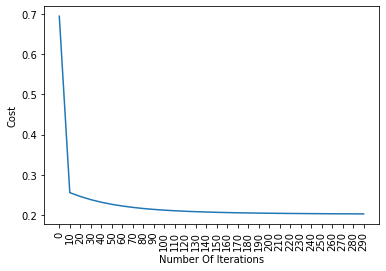

Test occuracy: 93.24127906976744% 


In [38]:
def logistic_regression(features_train, rc_train, features_test, rc_test, learning_rate, number_of_iterations):
    dimension = features_train.shape[0] # that is 5(features)
    weights, bias = initialize_weights_and_bias(dimension)
    
    parameters, gradients, cost_list = update(weights, bias, features_train, rc_train, learning_rate, number_of_iterations) 
    
    rc_prediction_test = predict(parameters["weights"], parameters["bias"], features_test)
    
    print("Test occuracy: {}% ".format(100-np.mean(np.abs(rc_prediction_test - rc_test))*100))
    
logistic_regression(features_train, rc_train, features_test, rc_test, learning_rate = 5, number_of_iterations = 300)

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(features_train.T,rc_train.T)
print("test accuracy {}".format(lr.score(features_test.T,rc_test.T)))

test accuracy 0.9331395348837209


Since we don't have enough data for under sampling, we should use over sampling approach to balance our dataset. 

In [40]:
## Get the Fraud and the normal dataset 

medium = inactive_data[inactive_data['AER_RISK_CLASS']==1]

low = inactive_data[inactive_data['AER_RISK_CLASS']==0]

In [41]:
print(medium.shape,low.shape)

(493, 59) (6386, 59)


In [42]:
from imblearn.combine import SMOTETomek

In [43]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
normalized_features_res,rc_res=smk.fit_sample(normalized_features,rc)

In [44]:
normalized_features_res.shape,rc_res.shape

((11818, 4), (11818,))

Let's split the data again and try the linear regression 

In [45]:
from sklearn.model_selection import train_test_split
features_train, features_test, rc_train, rc_test = train_test_split(normalized_features_res, rc_res ,test_size = 0.2 , 
                                                                      random_state = 42)

features_train = features_train.T
features_test = features_test.T
rc_train = rc_train.T
rc_test = rc_test.T

print("features_train: ", features_train.shape)
print("features_test ", features_test.shape)
print("rc_train: ", rc_train.shape)
print("rc_test: ", rc_test.shape)

features_train:  (4, 9454)
features_test  (4, 2364)
rc_train:  (9454,)
rc_test:  (2364,)


Cost after iterations 0: 0.692444 
Cost after iterations 10: 0.581800 
Cost after iterations 20: 0.537993 
Cost after iterations 30: 0.517994 
Cost after iterations 40: 0.507841 
Cost after iterations 50: 0.502271 
Cost after iterations 60: 0.499030 
Cost after iterations 70: 0.497046 
Cost after iterations 80: 0.495776 
Cost after iterations 90: 0.494925 
Cost after iterations 100: 0.494328 
Cost after iterations 110: 0.493890 
Cost after iterations 120: 0.493554 
Cost after iterations 130: 0.493285 
Cost after iterations 140: 0.493061 
Cost after iterations 150: 0.492868 
Cost after iterations 160: 0.492697 
Cost after iterations 170: 0.492544 
Cost after iterations 180: 0.492403 
Cost after iterations 190: 0.492272 
Cost after iterations 200: 0.492150 
Cost after iterations 210: 0.492034 
Cost after iterations 220: 0.491925 
Cost after iterations 230: 0.491820 
Cost after iterations 240: 0.491721 
Cost after iterations 250: 0.491625 
Cost after iterations 260: 0.491534 
Cost after i

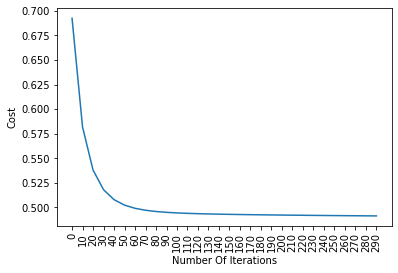

Test occuracy: 78.1725888324873% 


In [46]:
def logistic_regression(features_train, rc_train, features_test, rc_test, learning_rate, number_of_iterations):
    dimension = features_train.shape[0] # that is 5(features)
    weights, bias = initialize_weights_and_bias(dimension)
    
    parameters, gradients, cost_list = update(weights, bias, features_train, rc_train, learning_rate, number_of_iterations) 
    
    rc_prediction_test = predict(parameters["weights"], parameters["bias"], features_test)
    
    print("Test occuracy: {}% ".format(100-np.mean(np.abs(rc_prediction_test - rc_test))*100))
    
logistic_regression(features_train, rc_train, features_test, rc_test, learning_rate = 5, number_of_iterations = 300)

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(features_train.T,rc_train.T)
print("test accuracy {}".format(lr.score(features_test.T,rc_test.T)))

test accuracy 0.7800338409475466


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [49]:
# Let's divide into train and test sets
features_train, features_test, rc_train, rc_test = train_test_split(
    normalized_features_res, 
    rc_res,
    test_size=0.2,
    random_state=0)


print("features_train: ", features_train.shape)
print("features_test ", features_test.shape)
print("rc_train: ", rc_train.shape)
print("rc_test: ", rc_test.shape)

features_train:  (9454, 4)
features_test  (2364, 4)
rc_train:  (9454,)
rc_test:  (2364,)


### Logistic Regression

In [50]:
# model build on data with outliers

# call model
logit = LogisticRegression(random_state=44)

# train model
logit.fit(features_train, rc_train)

# make predicion on test set
pred = logit.predict_proba(features_test)

print('LogReg Accuracy: {}'.format(logit.score(features_test, rc_test)))
print('LogReg roc-auc: {}'.format(roc_auc_score(rc_test, pred[:, 1])))

LogReg Accuracy: 0.7787648054145516
LogReg roc-auc: 0.8455873932064408


Creating a list and append all models results

In [51]:
algorithm = []

### K Nearest Neighbor(KNN)

In [52]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
error = []
ConfustionMx = [];
for n in range(1,Ks):  
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(features_train, rc_train)
    yhat=neigh.predict(features_test)
    mean_acc[n-1] = metrics.accuracy_score(rc_test, yhat)  
    std_acc[n-1]=np.std(yhat==rc_test)/np.sqrt(yhat.shape[0])
    error.append(np.mean(yhat != rc_test))

mean_acc

array([0.90186125, 0.86928934, 0.87605753, 0.86717428, 0.87351946,
       0.87055838, 0.87098139, 0.86548223, 0.86040609, 0.85913706,
       0.85829103, 0.85617597, 0.85067682, 0.84856176, 0.84856176,
       0.84348562, 0.84348562, 0.83671743, 0.83756345])

Text(0.5, 0, 'Number of Nabors (K)')

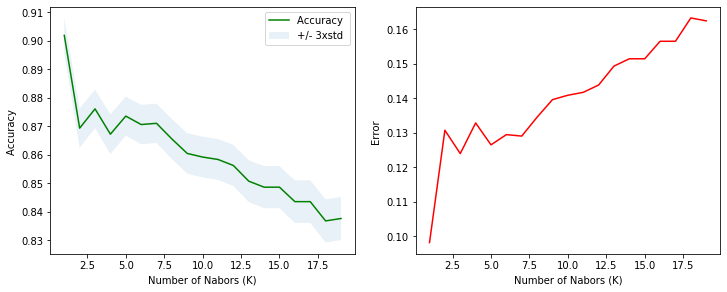

In [53]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')

plt.subplot(2,2,2)
plt.plot(range(1,Ks),error,'r')
plt.ylabel('Error ')
plt.xlabel('Number of Nabors (K)')


KNN gives the highest accuracy with K = 1 but since this is meaningless, I chose the second highest accuracy k =3. 

In [54]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9018612521150592 with k= 1


In [55]:
jaccard_knn = {}

neigh = KNeighborsClassifier(n_neighbors = 3).fit(features_train, rc_train)
yhat = neigh.predict(features_test)
pred = neigh.predict_proba(features_test)

jaccard_knn['KNN' +"_similarity"] = jaccard_score(rc_test, yhat, average = None)
jaccard_knn['KNN' + "_f1"] = f1_score(rc_test, yhat, average='weighted')
jaccard_knn['KNN' + "_log_loss"] = log_loss(rc_test, pred)
jaccard_knn['KNN' + "_accuracy"] = metrics.accuracy_score(rc_test, yhat)

algorithm.append([jaccard_score(rc_test, yhat, average = None), f1_score(rc_test, yhat, average='weighted'),
                  '', metrics.accuracy_score(rc_test, yhat)])

pd.DataFrame(jaccard_knn)

,KNN_similarity,KNN_f1,KNN_log_loss,KNN_accuracy
0,0.770376,0.875841,1.815391,0.876058
1,0.787835,0.875841,1.815391,0.876058


### Decision Tree

In [56]:
jaccard_drugtree = {}

drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(features_train, rc_train)
predTree = drugTree.predict(features_test)
pred = drugTree.predict_proba(features_test)

jaccard_drugtree['DecisionTree' +"_similarity"] = jaccard_score(rc_test, predTree, average = None)
jaccard_drugtree['DecisionTree' + "_f1"] = f1_score(rc_test, predTree, average='weighted')
jaccard_drugtree['DecisionTree' + "_log_loss"] = log_loss(rc_test, pred)
jaccard_drugtree['DecisionTree' + "_accuracy"] = metrics.accuracy_score(rc_test, predTree)

algorithm.append([jaccard_score(rc_test, predTree, average = None), f1_score(rc_test, predTree, average='weighted'),
                  '', metrics.accuracy_score(rc_test, predTree)])


pd.DataFrame(jaccard_drugtree)

,DecisionTree_similarity,DecisionTree_f1,DecisionTree_log_loss,DecisionTree_accuracy
0,0.652204,0.786316,0.44818,0.786379
1,0.643613,0.786316,0.44818,0.786379


### Support Vector 

In [57]:
kernel_type = ['rbf', 'linear', 'poly', 'sigmoid']
jaccard_acc = []
for type in kernel_type:
    clf = svm.SVC(kernel=type)
    clf.fit(features_train, rc_train) 
    yhat = clf.predict(features_test)
    yhat [0:5]

    jaccard_sim = jaccard_score(rc_test, yhat)
    dict = {}
    dict[type] = jaccard_sim
    jaccard_acc.append(dict)

In [58]:
jaccard_acc

[{'rbf': 0.6334269662921348},
 {'linear': 0.6351633078526755},
 {'poly': 0.6124260355029586},
 {'sigmoid': 0.22464503042596348}]

In [59]:
print( "The best accuracy was with", jaccard_acc[1]['linear'], "with Linear") 

The best accuracy was with 0.6351633078526755 with Linear


In [60]:
jaccard_sv = {}

clf = svm.SVC(kernel='linear')
clf.fit(features_train, rc_train) 
yhat = clf.predict(features_test)

jaccard_sv['SupportVector' +"_similarity"] = jaccard_score(rc_test, yhat, average = None)
jaccard_sv['SupportVector' + "_f1"] = f1_score(rc_test, yhat, average='weighted')
jaccard_sv['SupportVector' + "_log_loss"] = ''

jaccard_sv['SupportVector' + "_accuracy"] = metrics.accuracy_score(rc_test, yhat)

algorithm.append([jaccard_score(rc_test, yhat, average = None), f1_score(rc_test, yhat, average='weighted'),
                  '', metrics.accuracy_score(rc_test, yhat)])


jaccard_sv

{'SupportVector_similarity': array([0.63793103, 0.63516331]),
 'SupportVector_f1': 0.7779087275422978,
 'SupportVector_log_loss': '',
 'SupportVector_accuracy': 0.7779187817258884}

### Logistic Regression

In [61]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
jaccard = []
for item in solvers:
    LR = LogisticRegression(C=0.01, solver=item).fit(features_train, rc_train)
    yhat = LR.predict(features_test)
    yhat_prob = LR.predict_proba(features_test)
    dict = {}
    dict[item +"_similarity"] = jaccard_score(rc_test, yhat, average = None)
    dict[item + "_confusion"] = confusion_matrix(rc_test, yhat)
    dict[item + "_loss"] = log_loss(rc_test, yhat_prob)
    jaccard.append(dict)

jaccard

[{'newton-cg_similarity': array([0.64300482, 0.63801537]),
  'newton-cg_confusion': array([[933, 243],
         [275, 913]], dtype=int64),
  'newton-cg_loss': 0.5558432044099686},
 {'lbfgs_similarity': array([0.64300482, 0.63801537]),
  'lbfgs_confusion': array([[933, 243],
         [275, 913]], dtype=int64),
  'lbfgs_loss': 0.555843450099969},
 {'liblinear_similarity': array([0.63125   , 0.63505155]),
  'liblinear_confusion': array([[909, 267],
         [264, 924]], dtype=int64),
  'liblinear_loss': 0.5608788090151176},
 {'sag_similarity': array([0.64300482, 0.63801537]),
  'sag_confusion': array([[933, 243],
         [275, 913]], dtype=int64),
  'sag_loss': 0.5558472051541017},
 {'saga_similarity': array([0.64300482, 0.63801537]),
  'saga_confusion': array([[933, 243],
         [275, 913]], dtype=int64),
  'saga_loss': 0.5558371194057301}]

In [62]:
print( "The least log loss was with", jaccard[4]['saga_loss'], "with saga") 

The least log loss was with 0.5558371194057301 with saga


In [63]:
jaccard_lr = {}

LR = LogisticRegression(C=0.01, solver='saga').fit(features_train, rc_train)

yhat = LR.predict(features_test)
pred = LR.predict_proba(features_test)

jaccard_lr['LinearRegression' +"_similarity"] = jaccard_score(rc_test, yhat, average = None)
jaccard_lr['LinearRegression' + "_f1"] = f1_score(rc_test, yhat, average='weighted')
jaccard_lr['LinearRegression' + "_log_loss"] = log_loss(rc_test, pred)
jaccard_lr['LinearRegression' + "_accuracy"] = metrics.accuracy_score(rc_test, yhat)

algorithm.append([jaccard_score(rc_test, yhat, average = None), f1_score(rc_test, yhat, average='weighted'),
                  log_loss(rc_test, pred), metrics.accuracy_score(rc_test, yhat)])


jaccard_lr

{'LinearRegression_similarity': array([0.64300482, 0.63801537]),
 'LinearRegression_f1': 0.7808547689888493,
 'LinearRegression_log_loss': 0.5558390037043553,
 'LinearRegression_accuracy': 0.7808798646362098}

### AdaBoost

In [64]:
jaccard_adaboost = {}

# call model
ada = AdaBoostClassifier(n_estimators=200, random_state=44)

# train model
ada.fit(features_train, rc_train)

# make predictions
yhat = ada.predict(features_test)
pred = ada.predict_proba(features_test)

jaccard_adaboost['AdaBoost' +"_similarity"] = jaccard_score(rc_test, yhat, average = None)
jaccard_adaboost['AdaBoost' + "_f1"] = f1_score(rc_test, yhat, average='weighted')
jaccard_adaboost['AdaBoost' + "_log_loss"] = log_loss(rc_test, pred)
jaccard_adaboost['AdaBoost' + "_accuracy"] = metrics.accuracy_score(rc_test, yhat)

algorithm.append([jaccard_score(rc_test, yhat, average = None), f1_score(rc_test, yhat, average='weighted'),
                  log_loss(rc_test, pred), metrics.accuracy_score(rc_test, yhat)])

print(jaccard_adaboost)

{'AdaBoost_similarity': array([0.66689703, 0.65546819]), 'AdaBoost_f1': 0.7960031732485449, 'AdaBoost_log_loss': 0.6884062153489664, 'AdaBoost_accuracy': 0.7961082910321489}


### Random Forest

Feature: 0, Score: 0.54372
Feature: 1, Score: 0.24332
Feature: 2, Score: 0.17812
Feature: 3, Score: 0.03484


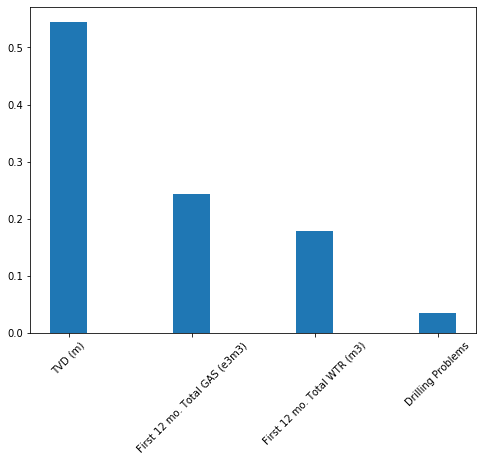

In [65]:
jacccard_rf ={}

# call model
rf = RandomForestClassifier(n_estimators=200, random_state=39)

# train model
rf.fit(features_train, rc_train)

# make predictions
yhat = rf.predict(features_test)

pred = rf.predict_proba(features_test)

importance = rf.feature_importances_
# summarize feature importance

for i,v in enumerate(importance):
    
	print('Feature: %0d, Score: %.5f' % (i,v))
    

jacccard_rf['RandomForest' +"_similarity"] = jaccard_score(rc_test, yhat, average = None)
jacccard_rf['RandomForest' + "_f1"] = f1_score(rc_test, yhat, average='weighted')
jacccard_rf['RandomForest' + "_log_loss"] = log_loss(rc_test, pred)
jacccard_rf['RandomForest' + "_accuracy"] = metrics.accuracy_score(rc_test, yhat)

# algorithm.append([jaccard_score(rc_test, yhat, average = None), f1_score(rc_test, yhat, average='weighted'),
                  # log_loss(rc_test, pred), metrics.accuracy_score(rc_test, yhat)])
                                                       
# plot feature importance
labels = ['TVD (m)','First 12 mo. Total GAS (e3m3)','First 12 mo. Total WTR (m3)', 
                          'Drilling Problems']
plt.figure(figsize=(8,6))
plt.bar([x for x in labels], importance, width = 0.3)
plt.xticks(rotation=45)
plt.show()

Creating a table with all the results

In [66]:
algorithm

[[array([0.77037618, 0.7878349 ]), 0.8758405319387031, '', 0.876057529610829],
 [array([0.65220386, 0.64361327]), 0.7863161244886487, '', 0.7863790186125211],
 [array([0.63793103, 0.63516331]), 0.7779087275422978, '', 0.7779187817258884],
 [array([0.64300482, 0.63801537]),
  0.7808547689888493,
  0.5558390037043553,
  0.7808798646362098],
 [array([0.66689703, 0.65546819]),
  0.7960031732485449,
  0.6884062153489664,
  0.7961082910321489]]

In [67]:
df_algorithm = pd.DataFrame(algorithm)

df_algorithm.columns = ['Jaccard','F1-score','LogLoss','Accuracy']
df_algorithm['Algorithm'] = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression', 'AdaBoost', 'Random Forest']


# moving 'Algorithm' to the first column

algorith_col = df_algorithm['Algorithm']
df_algorithm.drop(labels=['Algorithm'], axis=1,inplace = True)
df_algorithm.insert(0, 'Algorithm', algorith_col)
# if we want to drop Jaccard

df_algorithm.drop(labels=['Jaccard'], axis=1,inplace = True)


df_algorithm.set_index(['Algorithm'])


ValueError: Length of values does not match length of index

In [ ]:
f1score = df_algorithm['F1-score'].to_list()
f1score

In [ ]:
plt.figure(figsize=(20,16))
plt.subplot(3,3,1)
models =['KNN', 'Decision Tree', 'SVM', 'Logsitic Regression', 'AdaBoost', 'Random Forest']
f1score = df_algorithm['F1-score'].to_list()
plt.bar(models,f1score)
plt.xticks(rotation=45)
plt.xlabel('F1 Score for Six Predictors')

plt.subplot(3,3,2)
models =['KNN', 'Decision Tree', 'SVM', 'Logsitic Regression', 'AdaBoost', 'Random Forest']
accuracy = df_algorithm['Accuracy'].to_list()
plt.bar(models,accuracy)
plt.xticks(rotation=45)
plt.xlabel('Accuracy for Six Predictors')

plt.subplot(3,3,3)
models =['KNN', 'Decision Tree', 'SVM', 'Logsitic Regression', 'AdaBoost', 'Random Forest']
log_loss = [0,0,0,0.555844,0.688406,0.260926]
plt.bar(models,log_loss)
plt.xticks(rotation=45)
plt.xlabel('Log Loss for Six Predictors')

Plotting the ROC curve 

Logistic: ROC AUC=0.926
Logistic: ROC AUC=0.841
Logistic: ROC AUC=0.967
Logistic: ROC AUC=0.883


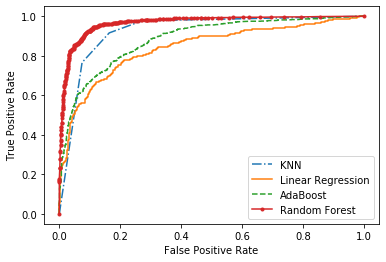

In [77]:
# call model
rf = RandomForestClassifier(n_estimators=200, random_state=39)
ada = AdaBoostClassifier(n_estimators=200, random_state=44)
lr = LogisticRegression(C=0.01, solver='saga').fit(features_train, rc_train)
neigh = KNeighborsClassifier(n_neighbors = 3).fit(features_train, rc_train)



# train model
rf.fit(features_train, rc_train)
ada.fit(features_train, rc_train)

# make predictions
yhat_rf = rf.predict(features_test)
yhat_ada = ada.predict(features_test)
yhat_lr = lr.predict(features_test)
yhat_knn = neigh.predict(features_test)

knn_probs = neigh.predict_proba(features_test)
lr_probs = lr.predict_proba(features_test)
ada_probs = ada.predict_proba(features_test)
rf_probs = rf.predict_proba(features_test)

# keep probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]
lr_probs = lr_probs[:, 1]
rf_probs = rf_probs[:, 1]
ada_probs = ada_probs[:, 1]
# calculate scores
knn_auc = roc_auc_score(rc_test, knn_probs)
lr_auc = roc_auc_score(rc_test, lr_probs)
rf_auc = roc_auc_score(rc_test, rf_probs)
ada_auc = roc_auc_score(rc_test, ada_probs)

# summarize scores
print('Logistic: ROC AUC=%.3f' % (knn_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Logistic: ROC AUC=%.3f' % (rf_auc))
print('Logistic: ROC AUC=%.3f' % (ada_auc))
# calculate roc curves
knn_fpr, knn_tpr, _ = roc_curve(rc_test, knn_probs)
lr_fpr, lr_tpr, _ = roc_curve(rc_test, lr_probs)
ada_fpr, ada_tpr, _ = roc_curve(rc_test, ada_probs)
rf_fpr, rf_tpr, _ = roc_curve(rc_test, rf_probs)
# plot the roc curve for the model
pyplot.plot(knn_fpr, knn_tpr, linestyle='-.', label='KNN')
pyplot.plot(lr_fpr, lr_tpr, linestyle='-', label='Linear Regression')
pyplot.plot(ada_fpr, ada_tpr, linestyle='--', label='AdaBoost')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()